In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
nig = pd.read_csv('heart_2022_no_nans.csv')

In [3]:
nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

<Axes: xlabel='SleepHours', ylabel='count'>

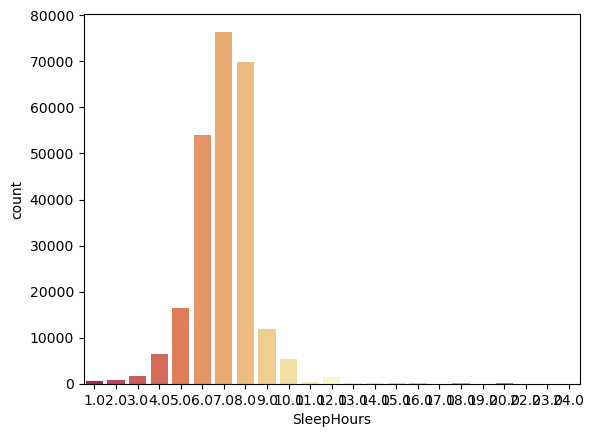

In [4]:
sns.countplot(data = nig , x ='SleepHours', palette = 'Spectral')

<Axes: xlabel='Sex', ylabel='SleepHours'>

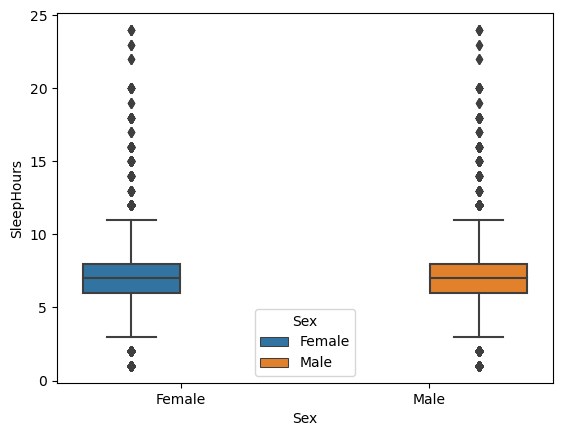

In [5]:
sns.boxplot(data = nig , x = 'Sex' , y = 'SleepHours' , hue = 'Sex')

In [6]:
nig2 = nig [ ['HeightInMeters','WeightInKilograms']].dropna()
nig2.head()

,HeightInMeters,WeightInKilograms
0,1.60,71.67
1,1.78,95.25
2,1.85,108.86
3,1.70,90.72
4,1.55,79.38


In [7]:
model = KMeans(n_clusters = 4,random_state = 0)
model.fit(nig2)

C:\Users\g18555\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [8]:
model.cluster_centers_

array([[  1.63709144,  61.71597163],
       [  1.76217172, 103.32777642],
       [  1.71278759,  81.65780688],
       [  1.78836478, 135.77818293]])

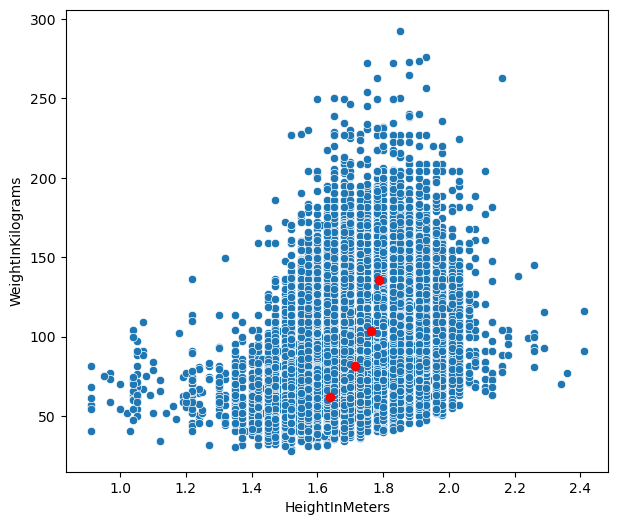

In [9]:
plt.figure(figsize=[7,6])
sns.scatterplot(data = nig2 , x = 'HeightInMeters' , y='WeightInKilograms')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1] ,color='r')

In [10]:
model.labels_

array([0, 1, 1, ..., 2, 2, 1])

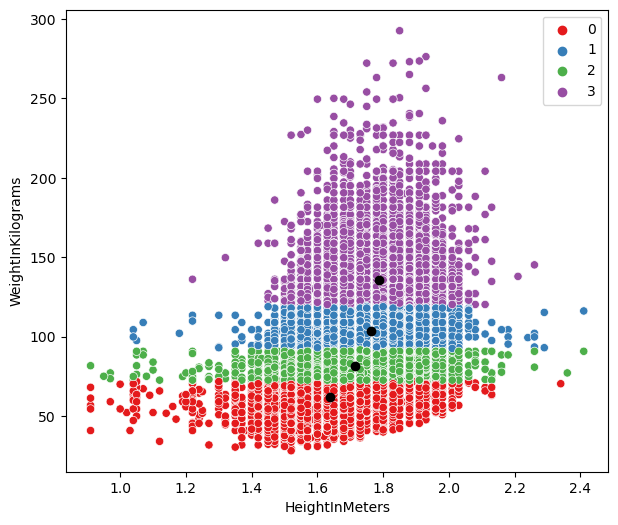

In [11]:
plt.figure(figsize=[7,6])
sns.scatterplot(data = nig2 ,  x = 'HeightInMeters' , y='WeightInKilograms'
               ,hue = model.labels_,palette = 'Set1')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1] ,color='k')

C:\Users\g18555\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


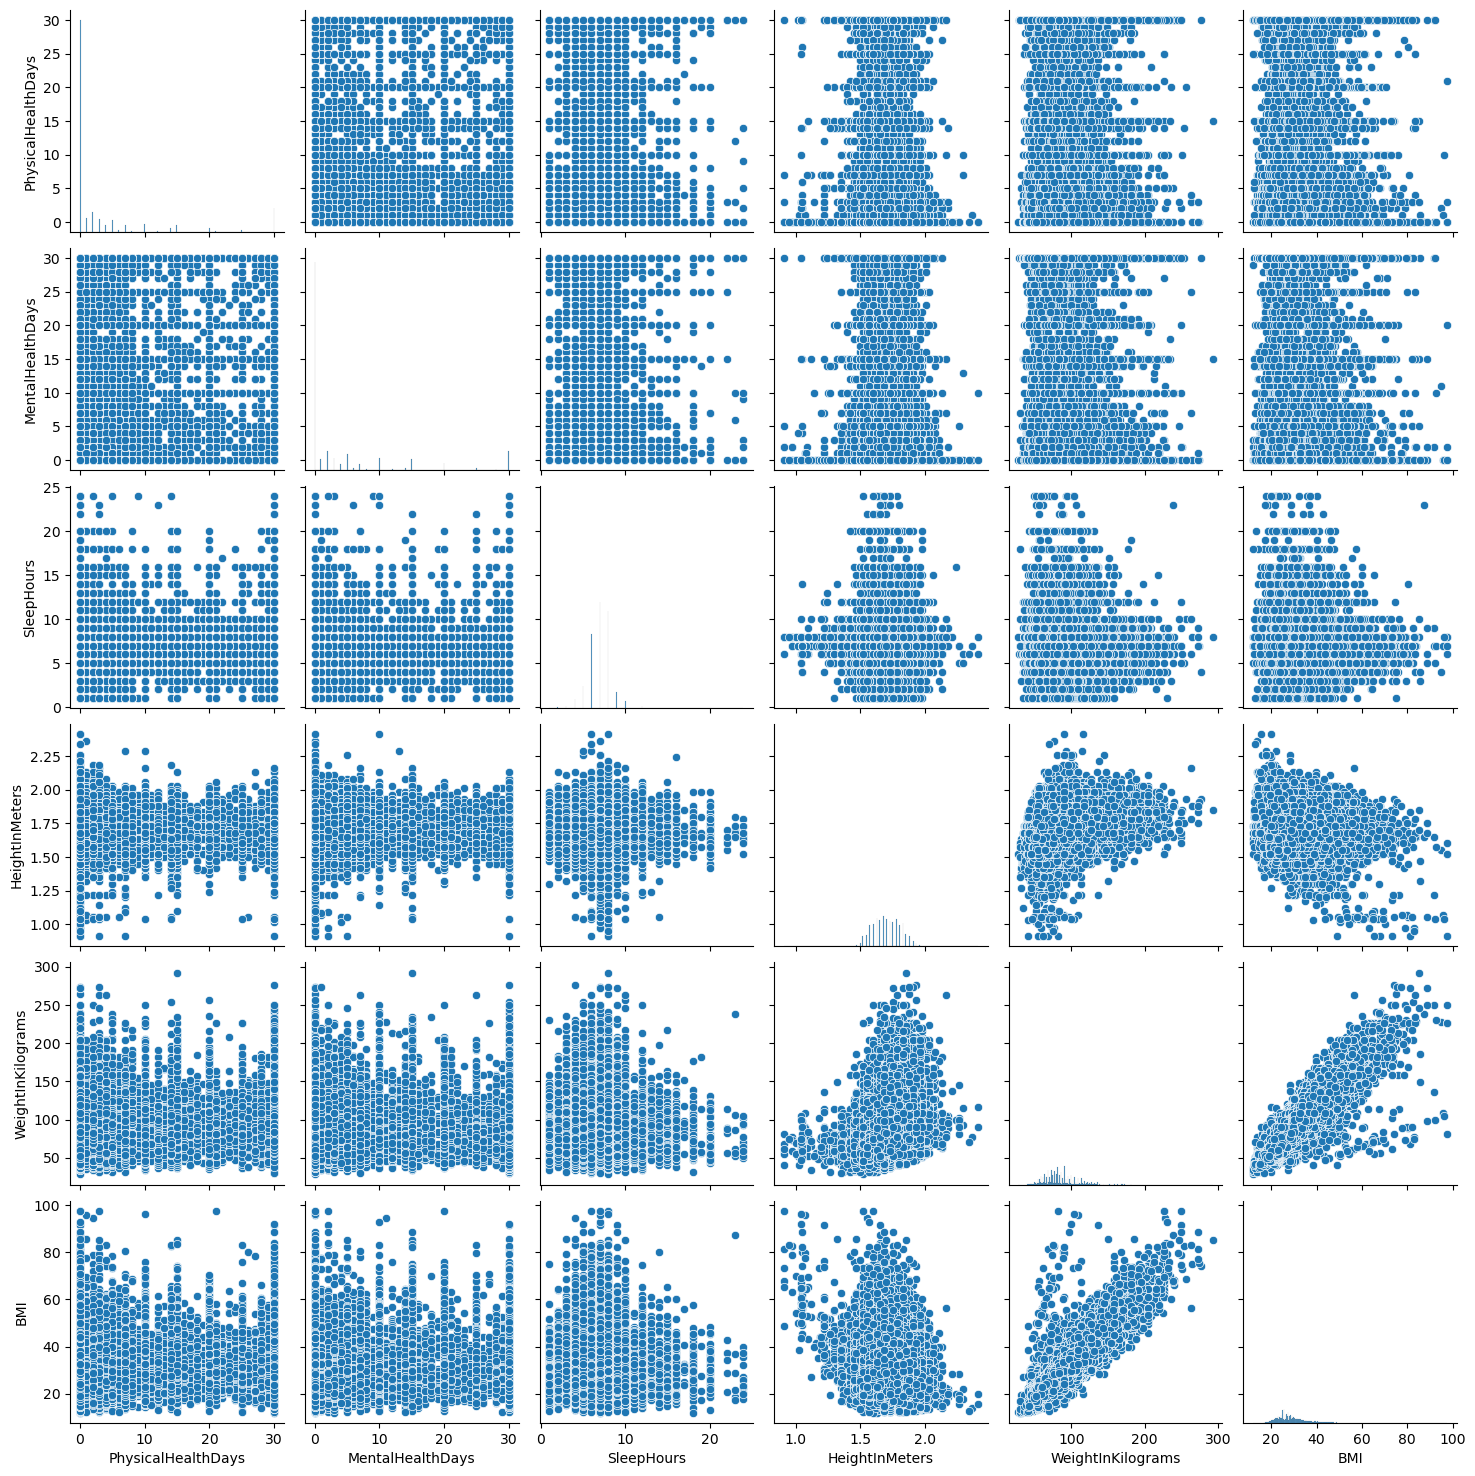

In [12]:
sns.pairplot(nig)

C:\Users\g18555\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


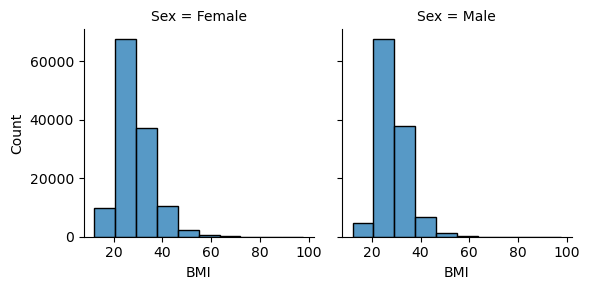

In [13]:
g=sns.FacetGrid(data=nig,col='Sex')
g.map(sns.histplot,'BMI',bins=10)

In [15]:
att = nig[['HeightInMeters','WeightInKilograms']]
label = nig['Sex']

att_train , att_test, class_train , class_test = train_test_split(att,label,random_state = 0,train_size=0.7)

scaler = StandardScaler()
scaler.fit(att_train)

att_train[['HeightInMeters','WeightInKilograms']] = scaler.transform(att_train)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(att_train,class_train)

model.score(scaler.transform(att_test), class_test)

C:\Users\g18555\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8196512525912176

In [16]:
result = pd.concat([att_test,class_test], axis = 1)
result['Gender'] = model.predict(scaler.transform(att_test))
result 

C:\Users\g18555\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,HeightInMeters,WeightInKilograms,Sex,Gender
172414,1.83,86.18,Male,Male
106325,1.57,68.04,Female,Female
215652,1.83,91.17,Male,Male
75392,1.55,81.65,Female,Female
55931,1.78,72.57,Male,Male
...,...,...,...,...
223654,1.55,72.57,Female,Female
202247,1.75,90.72,Female,Male
123655,1.55,58.97,Female,Female
52198,1.75,88.45,Male,Male


<Axes: xlabel='SleepHours', ylabel='Count'>

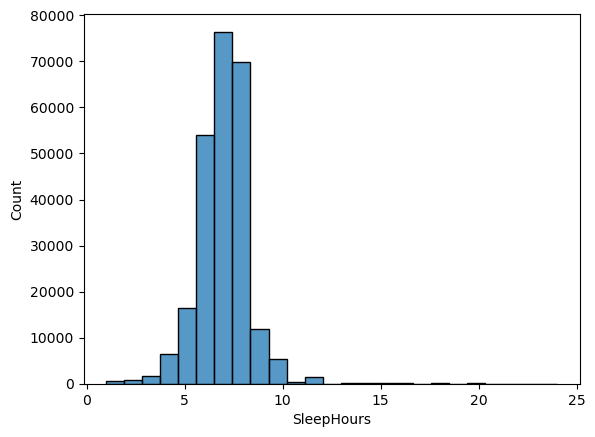

In [18]:
sns.histplot(nig['SleepHours'], bins = 25 )

<Axes: xlabel='Sex', ylabel='count'>

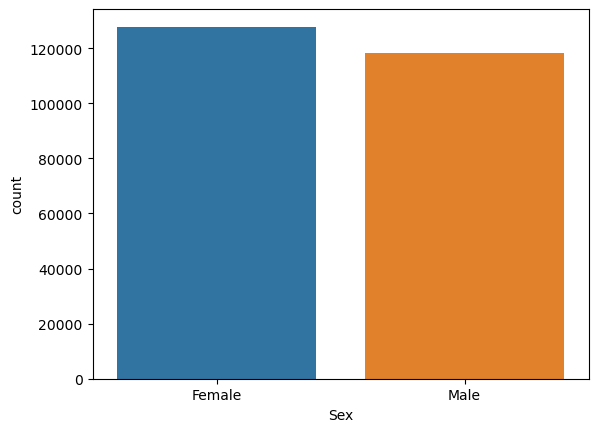

In [19]:
sns.countplot(data=nig,x='Sex')

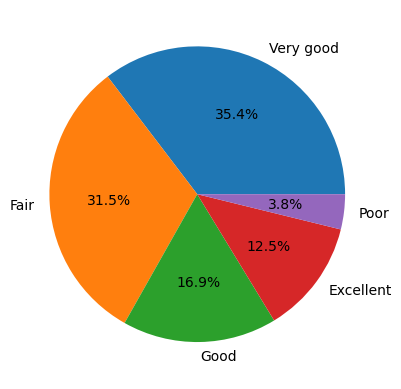

In [20]:
lb=nig['GeneralHealth'].unique()
data=nig['GeneralHealth'].value_counts()
plt.pie(data,labels=lb,autopct="%.1f%%")
plt.show()

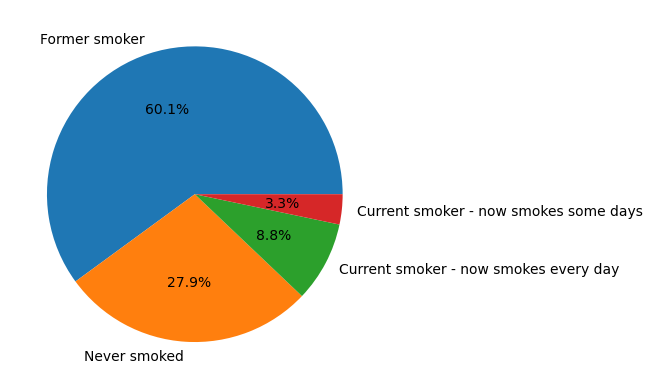

In [21]:
lb1=nig['SmokerStatus'].unique()
data=nig['SmokerStatus'].value_counts()
plt.pie(data,labels=lb1,autopct="%.1f%%")
plt.show()

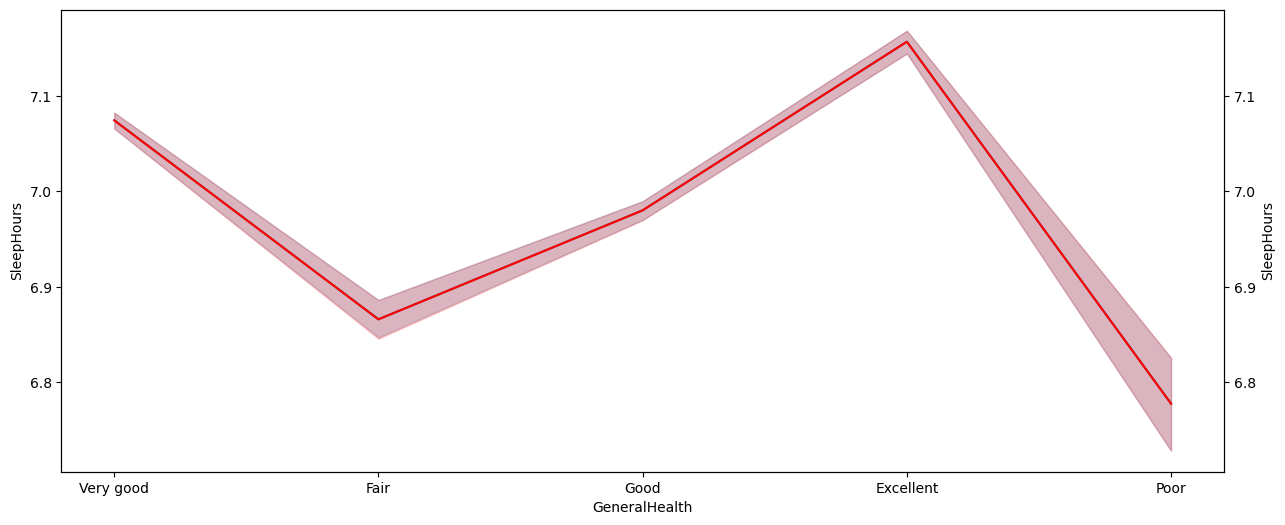

In [25]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x="GeneralHealth", y="SleepHours", data=nig)
ax2 = ax.twinx()
ax2 = sns.lineplot(x="GeneralHealth", y="SleepHours", data=nig, color='red')